In [91]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [92]:
KERNEL_PATH = "D:/m_learning/DSGuy/triangle2.png"
IMAGE_PATH = "D:/m_learning/DSGuy/christmas.png"
KERNEL_SIDE_SIZE = 11

In [93]:
def get_kernel_filename(path):
    return '_'.join(path.split('/')[-1].split('.')[:-1])

def get_image_filename(path):
    return path.split('/')[-1]


In [94]:
def prepare_kernel(path, kernel_side_size):
    kernel_dim = (kernel_side_size, kernel_side_size)
    black, white = 0, 255
    color_threshold = (black + white) // 2
    kernel = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    kernel = cv2.resize(kernel, kernel_dim)
    kernel[np.greater(kernel, color_threshold)] = white
    kernel[np.logical_not(np.greater(kernel, color_threshold))] = black
    return kernel

In [95]:
def prepare_image(path, kernel_side_size):
    image = cv2.imread(path, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255
    row_pad_left = row_pad_right = col_pad_top = col_pad_bottom = kernel_side_size // 2
    frame_dim = ((row_pad_left, row_pad_right), (col_pad_top, col_pad_bottom), (0, 0))
    image = np.pad(image, frame_dim, "constant")
    return (image, frame_dim)

In [96]:
def do_channel_bokeh(channel, kernel, frame_dim):
    kernel = np.flipud(kernel)
    channel_bokeh = np.zeros((channel.shape[0] - sum(frame_dim[0]), channel.shape[1] - sum(frame_dim[1])))
    for row in range(channel.shape[0] - kernel.shape[0] + 1):
        for col in range(channel.shape[1] - kernel.shape[1] + 1):
            img_slice = channel[row: kernel.shape[0] + row, col: kernel.shape[1] + col]
            product = np.sum(img_slice * kernel) / np.sum(kernel)
            channel_bokeh[row, col] = product * 255
    return channel_bokeh

In [97]:
kernel = prepare_kernel("D:/m_learning/DSGuy/triangle2.png", KERNEL_SIDE_SIZE)
image, frame_dim = prepare_image("D:/m_learning/DSGuy/christmas.png", KERNEL_SIDE_SIZE)

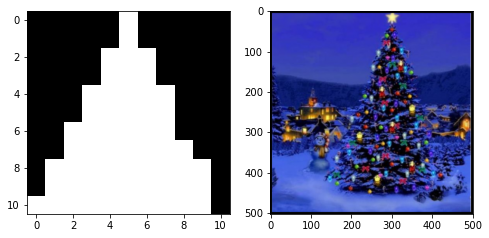

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4));
for axs, img in enumerate([kernel, image]):
    axes[axs].imshow(img, cmap='gray');

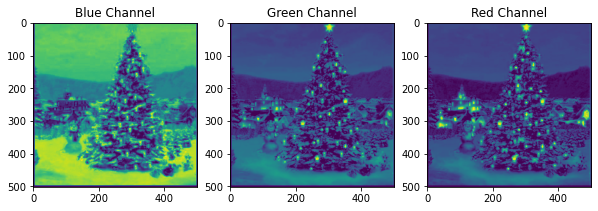

In [99]:
red_channel, green_channel, blue_channel = cv2.split(image)
channels = {
    'Blue Channel': blue_channel,
    'Green Channel': green_channel, 
    'Red Channel': red_channel
}

fig, axes = plt.subplots(1, 3, figsize=(10, 4));
for axs, channel in enumerate(channels.keys()):
    axes[axs].imshow(channels[channel]);
    axes[axs].title.set_text(channel)

In [100]:
image_bokeh = []
for channel_image in channels.values():
    channel_bokeh = do_channel_bokeh(channel_image, kernel, frame_dim)
    image_bokeh.insert(0, channel_bokeh)

In [101]:
image_bokeh = cv2.merge(image_bokeh).astype(np.uint8)

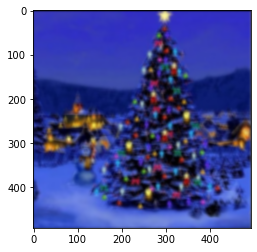

In [102]:
plt.imshow(image_bokeh)